<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png"
         width="500" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>
            Chair of Soil Mechanics and Foundation Engineering<br>
            Geotechnical Institute<br>
            Technische Universität Bergakademie Freiberg.
        </p>
        <p>
            <a href="https://tu-freiberg.de/en/soilmechanics">
                https://tu-freiberg.de/en/soilmechanics
            </a>
        </p>
    </div>
</div>

<div style="display: flex; align-items: center;">
    <p style="margin-top: 1em;">
        To activate the <strong>interactive features</strong> when in nbviewer mode, click on &quot;Execute on Binder&quot;
        <img src="https://mybinder.org/static/favicon.ico"
             alt="Binder"
             style="height: 1.1em; vertical-align: middle; margin: 0 6px;">
        on the top right. Then, click on Run → Run All Cells.
    </p>
</div>


# Exercise on the least squares method

You're given a CPT data set consisting of cone resistance $q_\text{c}$ and frictional resistance $f_\text{s}$ measurements. Your first task is to check the results by plotting them and to compute as well as plot the friction ratio $R_\text{f}$.

In [1]:
import numpy as np #numerical methods
#import sympy as sp #symbolic operations
import matplotlib.pyplot as plt #plotting
import pandas as pd

#Some plot settings
%run plot_functions/plot_settings.py

In [2]:
CPT_data = pd.read_csv('Data/CPT_2015.csv')

In [3]:
z = CPT_data.Teufe[1:].to_numpy(dtype=float)
qc = CPT_data.qc[1:].to_numpy(dtype=float)
fs = CPT_data.fs[1:].to_numpy(dtype=float)
with np.errstate(divide='ignore',invalid='ignore'):
    Rf = np.divide(fs,qc)

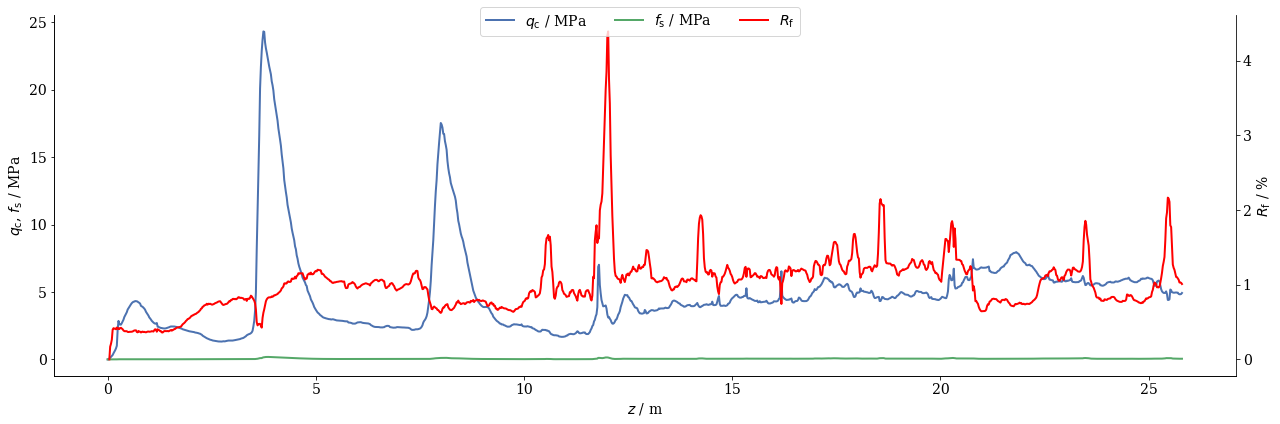

In [4]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(z, qc, label=r'$q_\mathrm{c}$ / MPa')
ax.plot(z, fs, label=r'$f_\mathrm{s}$ / MPa')

ax2 = ax.twinx()
ax2.spines["right"].set_visible(True)
ax2.plot(z,Rf* 100., color='red', label = '$R_\mathrm{f}$')

ax.set_xlabel(r'$z$ / m')
ax.set_ylabel(r'$q_\mathrm{c}$, $f_\mathrm{s}$ / MPa')
ax2.set_ylabel(r'$R_\mathrm{f}$ / %')

fig.legend(loc='upper center',ncol=3)
fig.tight_layout()

You're also given data on the relationship between $q_\text{c}$ and $I_\text{D}$. The data is valid only for $z > 2$ m as well as above the phreatic surface. Your task is now to find a functional relationship $I_\text{D}(q_\text{c})$ in order to estimate the $I_\text{D}$ distribution in the above soil profile investigated with cone prenetration testing.

In [5]:
ID_data = pd.read_csv('Data/qc_ID.csv')

In [6]:
ID_data

,qc,ID
0,MPa,NaN
1,3,0.025327
2,6,0.189061
3,9,0.407843
4,12,0.361879
...,...,...
67,11,0.510890
68,15,0.538081
69,19,0.634794
70,23,0.719363


In [7]:
qc_ID = ID_data.qc[1:].to_numpy(dtype=float)
ID = ID_data.ID[1:].to_numpy(dtype=float)

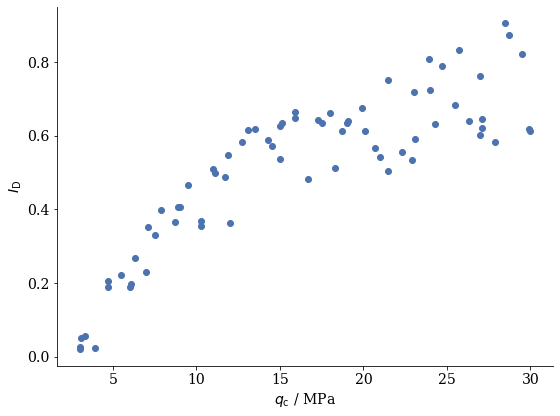

In [8]:
fig, ax = plt.subplots()
ax.plot(qc_ID, ID,ls='',marker='o')

ax.set_xlabel(r'$q_\mathrm{c}$ / MPa')
ax.set_ylabel(r'$I_\mathrm{D}$')

fig.tight_layout()